<a href="https://colab.research.google.com/github/SebatianUseche/Regresi-n_Lineal_SalarioVsExperiencia/blob/main/Regresi%C3%B3n_Lineal_SalarioVsExperiencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Formulación de un Modelo Lineal Simple

### Caso del negocio:
Una empresa requiere determinar cual es la relación que pudiera existir entre el salario de un trabajador y sus años de experiencia.

### Planteamiento:
* Pregunta a resolver:  Determinar cual es el salario de un trabajador basado en el número de años de experiencia.
* Fuente de datos: Se cuenta con una base de datos que tiene información del salario y años de experiencia de 30 trabajadores.
* Vamos a plantear un modelo bastante simple de regresión lineal que encuentre la relación entre el salario de un trabajador y sus años de experiencia.
* El dataset utilizado se obtuve de "https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression?utm_source=chatgpt.com&select=Salary_dataset.csv"




In [ ]:
# Librerías para el tratamiento de los datos
import numpy as np
import pandas as pd

# Librerías para entrenamiento y modelado
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data e Inteligencia Artificial/Proyectos independientes/Regresión lineal/Salary_dataset.csv',index_col=0) # El index_col=0 se utiliza para quitar esa primera columna que contiene nuestro data set

df.sample(10)

,YearsExperience,Salary
26,9.6,116970.0
25,9.1,105583.0
13,4.2,57082.0
15,5.0,67939.0
22,8.0,101303.0
16,5.2,66030.0
5,3.0,56643.0
28,10.4,122392.0
11,4.1,55795.0
1,1.4,46206.0




*   La primera columna YearsExperience representa los años de experiencia de un trabajador individual.
*   La segunda columna Salary representa el salario anual de un trabajador individual.

Cambiamos los nombres de las columas a español.




In [ ]:
df = df.rename(columns={
    "YearsExperience": "AñosExperiencia",
    "Salary": "Salario"
})

Se revisa el tamañao del dataset

In [ ]:
df.shape

(30, 2)

Revisamos si las columnas contienen valores nulls

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AñosExperiencia  30 non-null     float64
 1   Salario          30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


* El campo *AñosExperiencia* presenta 30 valores no nulos, no posee valores
nulos
* El campo *Salario* presenta 30 valores no nulos, es decir, tampoco presenta valores nulos


Estadística descriptiva de los datos

In [ ]:
df.describe()

,AñosExperiencia,Salario
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


* El promedio de numero de años de experiencia que tiene un individuo en este dataset es de 5.4 años.
* El salario (en dólares) promedio de un individuo en este dataset es de $76,004

In [ ]:
df.skew()

,0
AñosExperiencia,0.37956
Salario,0.35412


📊 Observaciones:
- El rango de AñosExperiencia es de 1.2000000000000002 a 10.6.
- El promedio es 5.41 y la mediana es 4.80.
- No se detectaron valores atípicos.
- Primer cuartil 3.3000000000000003.
- Tercer cuartil 7.8.
- Rango intercuartil 4.5


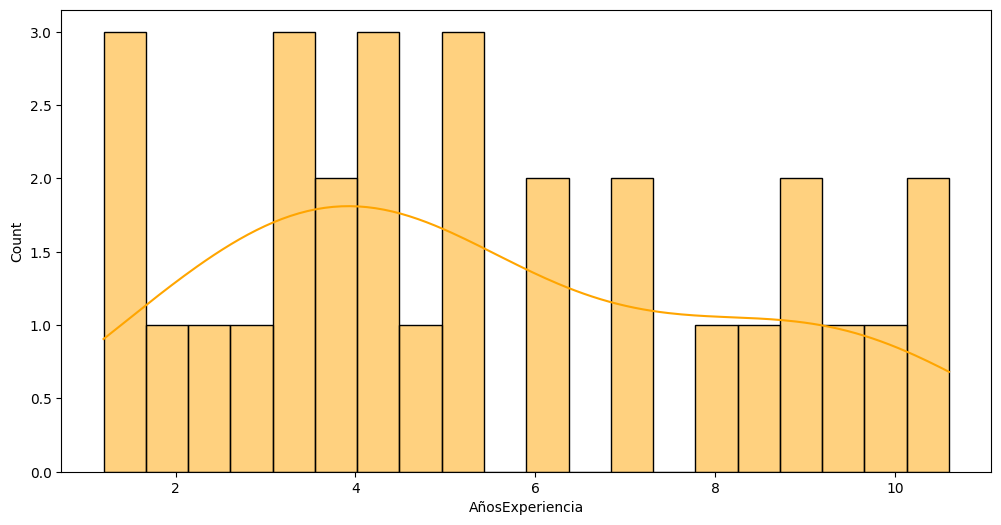

In [ ]:
plt.figure(figsize = (12, 6))

sns.histplot(x = df['AñosExperiencia'], bins = 20, kde = True, color = 'orange')

# 2️⃣ Generar observaciones automáticas
valor_min = df['AñosExperiencia'].min()
valor_max = df['AñosExperiencia'].max()
promedio = df['AñosExperiencia'].mean()
mediana = df['AñosExperiencia'].median()

# Detectar valores atípicos con método IQR
Q1 = df['AñosExperiencia'].quantile(0.25)
Q3 = df['AñosExperiencia'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers = df[(df['AñosExperiencia'] < limite_inferior) | (df['AñosExperiencia'] > limite_superior)]

print("📊 Observaciones:")
print(f"- El rango de AñosExperiencia es de {valor_min} a {valor_max}.")
print(f"- El promedio es {promedio:.2f} y la mediana es {mediana:.2f}.")
print(f"- {'No se detectaron' if outliers.empty else f'Se detectaron {len(outliers)}'} valores atípicos.")
print(f"- Primer cuartil {Q1}.")
print(f"- Tercer cuartil {Q3}.")
print(f"- Rango intercuartil {IQR}")

📊 Observaciones:
- El rango de Salario es de 37732.0 a 122392.0.
- El promedio es 76004.00 y la mediana es 65238.00.
- No se detectaron valores atípicos.
- Primer cuartil 56721.75.
- Tercer cuartil 100545.75.
- Rango intercuartil 43824.0


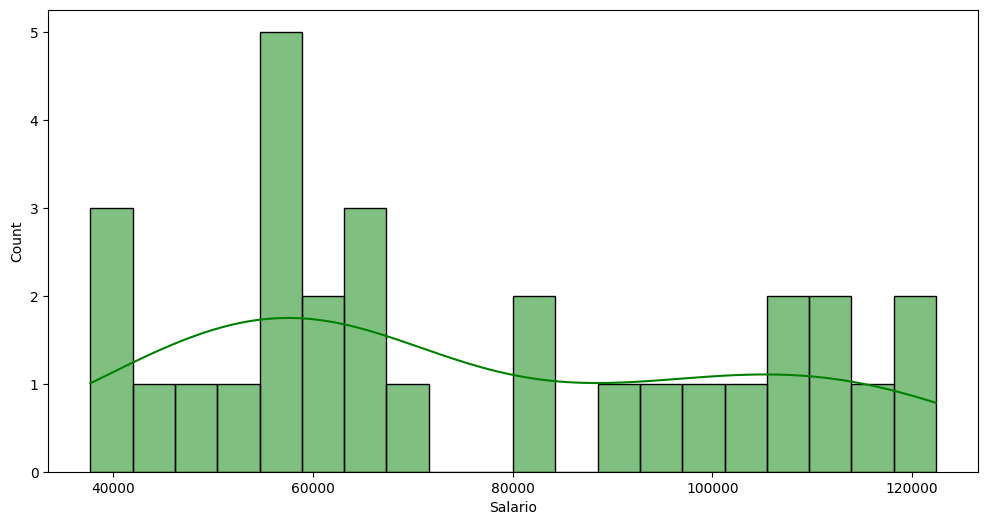

In [ ]:


plt.figure(figsize = (12, 6))

sns.histplot(x = df['Salario'], bins = 20, kde = True, color = 'green')

# 2️⃣ Generar observaciones automáticas
valor_min = df['Salario'].min()
valor_max = df['Salario'].max()
promedio = df['Salario'].mean()
mediana = df['Salario'].median()

# Detectar valores atípicos con método IQR
Q1 = df['Salario'].quantile(0.25)
Q3 = df['Salario'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers = df[(df['Salario'] < limite_inferior) | (df['Salario'] > limite_superior)]

print("📊 Observaciones:")
print(f"- El rango de Salario es de {valor_min} a {valor_max}.")
print(f"- El promedio es {promedio:.2f} y la mediana es {mediana:.2f}.")
print(f"- {'No se detectaron' if outliers.empty else f'Se detectaron {len(outliers)}'} valores atípicos.")
print(f"- Primer cuartil {Q1}.")
print(f"- Tercer cuartil {Q3}.")
print(f"- Rango intercuartil {IQR}")

<Axes: ylabel='AñosExperiencia'>

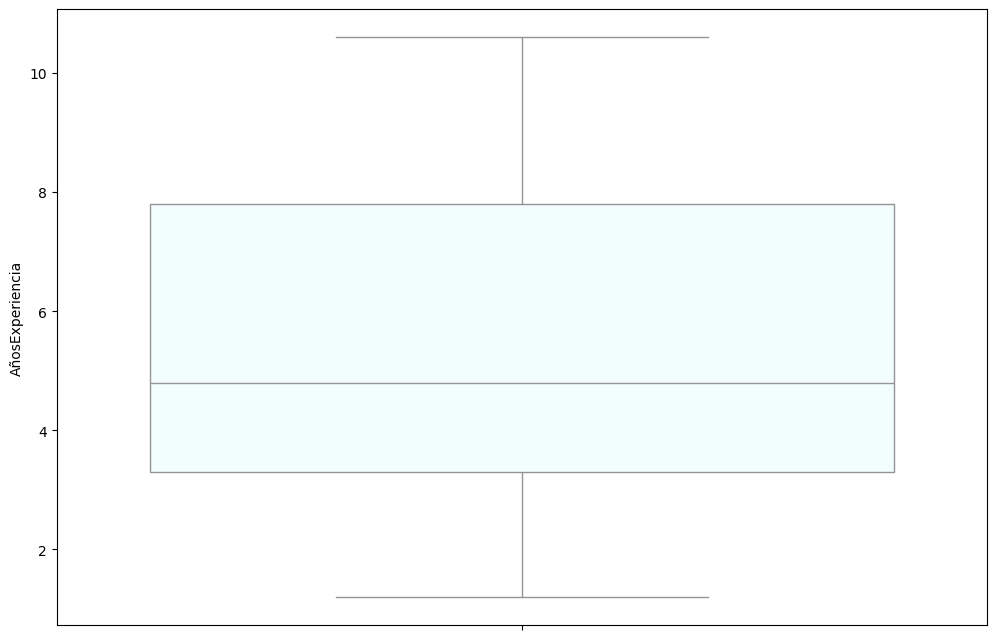

In [ ]:
plt.figure(figsize = (12, 8))

sns.boxplot(y = df['AñosExperiencia'], color = 'azure')

<Axes: ylabel='Salario'>

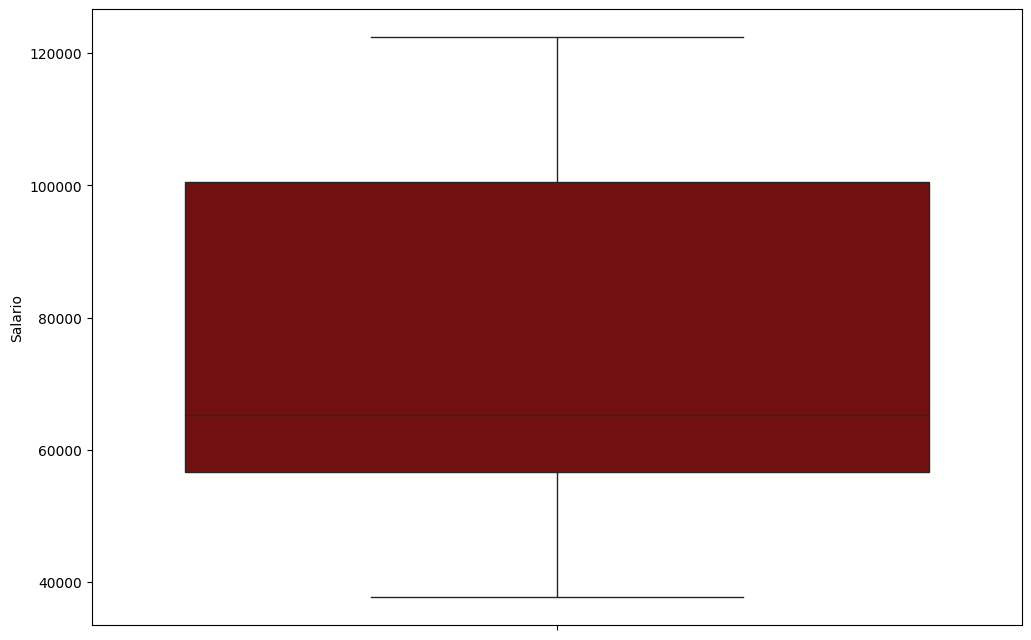

In [ ]:
plt.figure(figsize = (12, 8))

sns.boxplot(y = df['Salario'], color = 'maroon')

Los *outliers* son detectados utilizado el método IQR, con este método, un *Outlier* es un punto que está **1.5 veces el valor del rango intercuartil** arriba del tercer cuartil o abajo del primer cuartil.

Mostramos solamente las filas que son *outliers*:

In [ ]:
Q1 = df.quantile(0.25, axis=0)
Q3 = df.quantile(0.75, axis = 0)
IQR = Q3 - Q1

salary_data_outliers = df[((df < (Q1 - 1.5 * IQR)) |\
                                    (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

salary_data_outliers

,AñosExperiencia,Salario


* Podemos ver que no existen *outliers* en nuestros datos, para ninguna de las columnas.
* Si fuera el caso de que efectivamente existieran *outliers*, entonces al dataframe que vamos a utilizar para entrenar nuestro modelo le deberíamos de quitar los *outliers* definidos anteriormente de la siguiente manera:

In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |\
                            (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

df.shape

(30, 2)

* Vemos que permanecemos con los 35 registros, ya que no hay *outliers* que eliminar.

## Regresión Lineal

### Relación entre variables

Antes de realizar el modelo de regresión lineal, veamos la relación entre las variables *'AñosExperiencia'* y *'Salario'*

Text(0.5, 1.0, 'Relación entre Años de Experiencia y Salario')

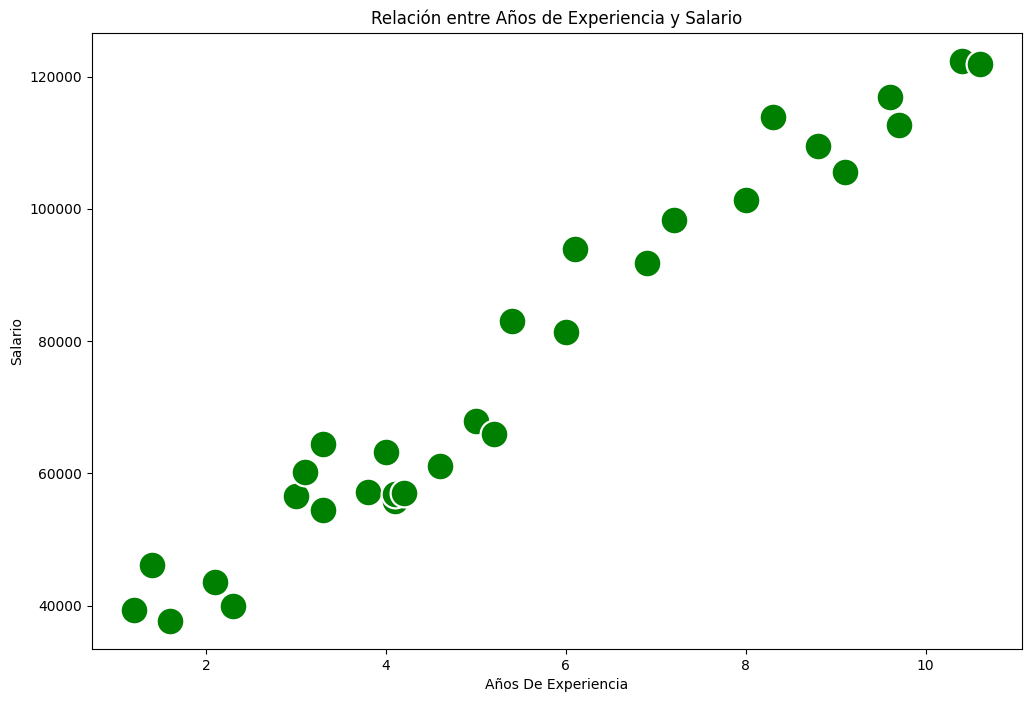

In [ ]:
plt.figure(figsize = (12, 8))

sns.scatterplot(x = 'AñosExperiencia', y = 'Salario',
                s = 400, color = 'green',
                data = df)

plt.xlabel('Años De Experiencia')
plt.ylabel('Salario')
plt.title('Relación entre Años de Experiencia y Salario')

* Entre más años de experiencia tenga un individuo más alto sera su salario.  

### Datasets de entrenamiento y de pruebas

* Utilizamos la función *train_test_split* para configurar la partición de datos que vamos a realizar
* Con el parámetro *random_state = 42*, estamos indicando a sklearn que barajee los datos asi evitamos que las particiones sigan algún tipo de patron.
* Con el parámetro *test_size = 0.3*, Estamos indicando a sklearn que utilice el 30% de nuestros datos para pruebas (para evaluar nuestro modelo).
    * 70% de los datos serán utilizados para entrenar nuestro modelo
    * 30% de los datos serán utilizados para probar nuestro modelo

In [ ]:
# Dataset con las variables predictoras
X = df['AñosExperiencia']

# Dataset con la variable target
y = df['Salario']

# Dividimos nuestro dataset en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Vemos el número de registros de variables predictoras para los datasets de entrenamiento y de pruebas:

In [ ]:
X_train.shape, X_test.shape

((21,), (9,))

Vemos el número de registros de la variable target para los datasets de entrenamiento y de pruebas:

In [ ]:
y_train.shape, y_test.shape

((21,), (9,))

### Modelo de Regresión Lineal

* Vamos a utilizar el modelo de regresión lineal en *scikit-learn*, para entrenar nuestro modelo de regresión lineal simple.
* El modelo de *scikit-learn* espera como entrada que los datos de entrenamiento estén en un array multidimensional, por lo tanto, en nuestro caso
  necesitamos hacer un *reshape* (remodelar) a nuestros datos.  
    * Para nuestro modelo lineal simple necesitamos un arreglo de n filas (24 filas en nuestro caso) y 1 columna

#### Reshape de los datos

In [ ]:
# Convertimos los datos de entrenamiento a un array de numpy
# y luego remodelamos los datos de entrenamiento para asegurarnos que sea un arreglo multidimensional que conste de n filas y 1 columna

# Los datos de entrada de la variable predictora para el entrenamiento
X_train = X_train.to_numpy()
X_train = X_train.reshape((-1, 1))

# Los datos de entrada de la variable target para el entrenamiento
y_train = y_train.to_numpy()
y_train = y_train.reshape((-1, 1))

X_train.shape, y_train.shape

((21, 1), (21, 1))

* De la misma manera procedemos con los datos de pruebas para pasarlos a un arreglo de dos dimensiones de n filas (9 filas en nuestro caso) y 1 columna

In [ ]:
# Convertimos los datos para pruebas a un array de numpy
# y luego remodelamos los datos para pruebas y asegurarnos que sea un arreglo multidimensional que conste de n filas y 1 columna

# Los datos de entrada de la variable predictora para las pruebas
X_test = X_test.to_numpy()
X_test = X_test.reshape((-1, 1))

# Los datos de entrada de la variable target para las pruebas
y_test = y_test.to_numpy()
y_test = y_test.reshape((-1, 1))

X_test.shape, y_test.shape

((9, 1), (9, 1))

#### Entrando el modelo

Con los datos de entrenamiento, creamos el modelo de regresión y lo entrenamos:

In [ ]:
# Instanciamos un modelo de regresión lineal de scikit-learn
lr = LinearRegression()

# Entrenamos (ajustamos) nuestro modelo de regresión lineal con los datos de entrenamiento
linear_reg_model = lr.fit(X_train, y_train)

Vemos los *Coeficientes* e *Interceptos* obtenidos después del entrenamiento del modelo:

Nota: estos coeficientes e interceptos son los mismos que podemos obtener utilizando el método *statsmodels*


In [ ]:
# Coeficientes del modelo de regresión lineal
linear_reg_model.coef_

array([[9339.08172382]])

* Tenemos solamente un coeficiente y corresponde al predictor *AñosExperiencia*.
* El hecho de que este coeficiente sea positivo indica que existe una correlación positiva entre los años de experiencia (*AñosExperiencia*) y el salario (*Salario*)
    * Entre más alto sea el número de años de experiencia (*AñosExperiencia*) más alto será el salario (*Salario*)
* Este coeficiente nos indica la taza de cambio entre el salario y los años de experiencia.
    * Por cada unidad aumentada o disminuida en la variable predictora, nos indica el aumento o disminución correspondiente en el target
    * En nuestro caso, por cada año mas de experiencia, el salario aumenta aprox. $9,339

In [ ]:
# Interceptos del modelo de regresión lineal
linear_reg_model.intercept_

array([24985.53016251])

* Tenemos el intercepto y nos indica el valor del salario (target *Salario*) cuando se tiene 0 años de experiencia (predictor *AñosExperiencia*=0)
* Vemos que el intercepto también es un valor positivo.

#### Probando y Evaluando el modelo

Ahora con nuestro modelo ya ajustado, lo probamos haciendo predicciones sobre nuestros datos de prueba:

In [ ]:
# Realizamos predicciones con nuestro modelo de regresión utilizando los datos de prueba
y_pred = linear_reg_model.predict(X_test)

# Mostramos las primeras cinco estimaciones obtenidas
y_pred[:5]

array([[115574.62288352],
       [ 71680.93878159],
       [102499.90847018],
       [ 75416.57147111],
       [ 55804.4998511 ]])

Evaluamos el puntaje (*score*) de nuestro modelo sobre los datos de entrenamiento:

In [ ]:
print('Puntaje del modelo de regresión sobre los datos de entrenamiento: ', linear_reg_model.score(X_train, y_train))

Puntaje del modelo de regresión sobre los datos de entrenamiento:  0.9574526669392872


* Vemos un puntaje alto cerca del 95%.   
    * Es decir, nuestro modelo explica cerca del 95% de la varianza en nuestros datos.
* El puntaje es el valor de la *métrica R-Cuadrado* (*R-Square*) de nuestro modelo de regresión lineal sobre los datos de entrenamiento

In [ ]:
print('Puntaje del modelo de regresión sobre los datos de pruebas: ', linear_reg_model.score(X_test, y_test))

Puntaje del modelo de regresión sobre los datos de pruebas:  0.9414466227178215


* Vemos un puntaje (R-Cuadrado) alto cerca del 94%.  Un poco más bajo que el que obtuvimos con los datos de entrenamiento, y esto es normal.
* Este puntaje nos indica el desempeño de nuestro modelo sobre datos nuevos que nunca ha visto.

Ahora realizamos un gráfico del modelo de regresión lineal que fue ajustado/entrenado sobre los datos de entrenamiento:
* Vamos a graficar un scatter plot de los puntos de datos de entrenamiento en color naranja
* Y luego graficamos un linea ajustada (tambien sobre los datos de entrenamiento) que represente nuestro modelo de regresión lineal: Y = coef*X + intercept

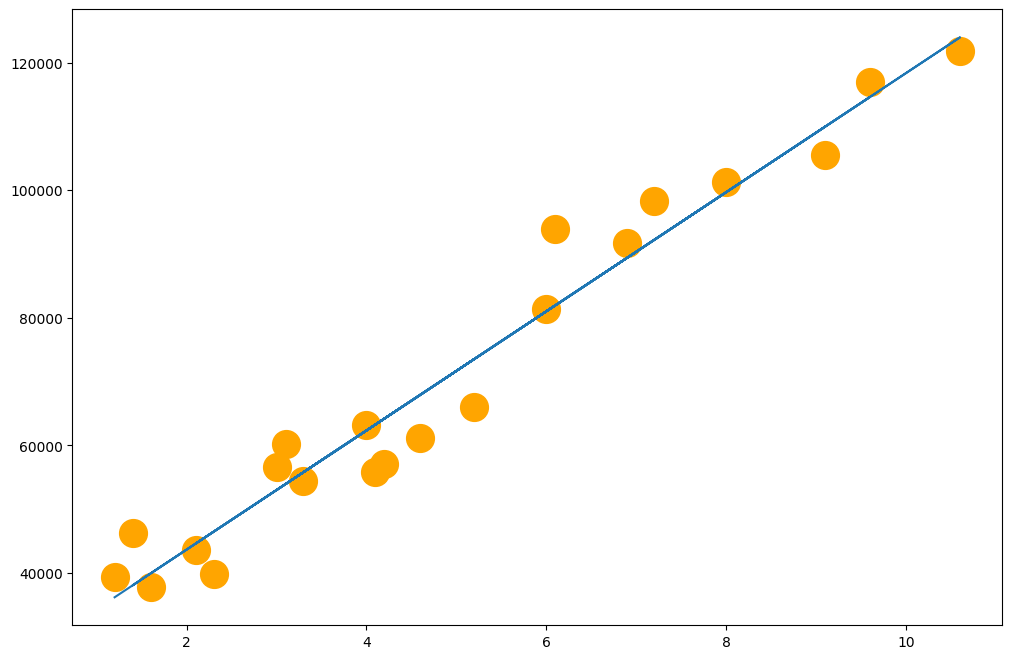

In [ ]:
f, ax = plt.subplots(figsize = (12, 8))

# graficamos los puntos de datos de entrenamiento en color naranja
plt.plot(X_train, y_train, 'o', markersize = 20, color = 'orange')
# graficamos una linea utilizando nuestro modelo de regresión lineal sobre los datos predictores de entrenamiento
plt.plot(X_train , linear_reg_model.coef_ * X_train + linear_reg_model.intercept_)

Podemos ver que la linea se ajusta bastante bien a los puntos.

Realizamos un gráfico del modelo de regresión lineal que fue ajustado/entrenado pero ahora sobre los datos de pruebas:

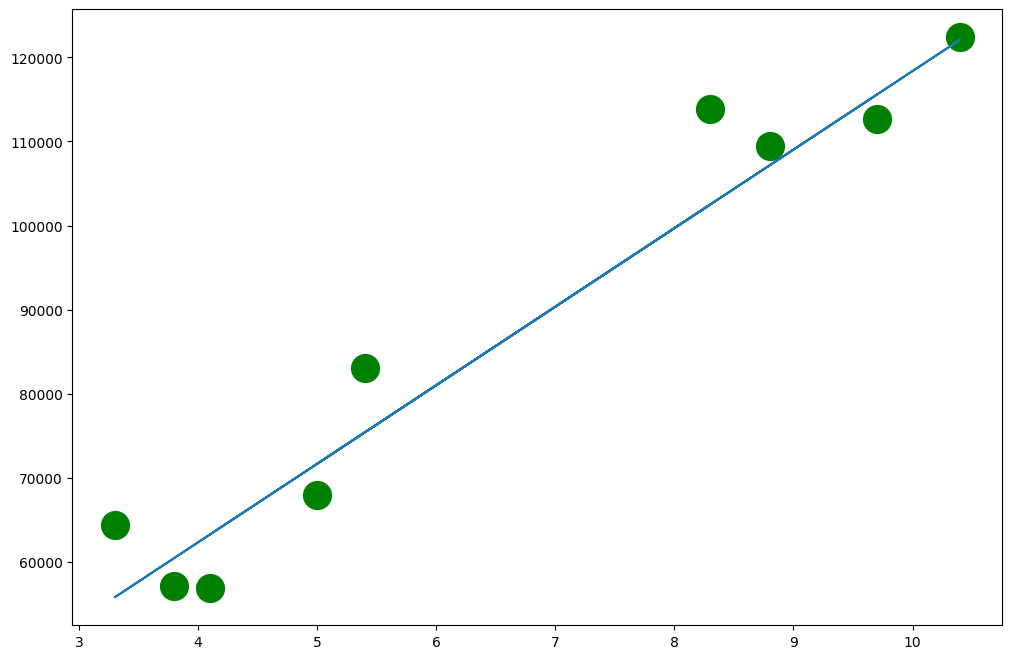

In [ ]:
f, ax = plt.subplots(figsize = (12, 8))

# graficamos los puntos de datos de pruebas en color verde
plt.plot(X_test, y_test, 'o', markersize = 20, color = 'green')
# graficamos una linea utilizando nuestro modelo de regresión lineal sobre los datos predictores de pruebas
plt.plot(X_test , linear_reg_model.coef_ * X_test + linear_reg_model.intercept_)

Podemos ver que acá la linea tambien se ajusta muy bien a los datos.